In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
#Import merged dataset 
csv_path = "max_temp_ca.csv"
df = pd.read_csv(csv_path)
df = pd.DataFrame(df)
df=df.rename(columns={"Location": "County"})
df.head()

,Location ID,County,Year,Month,Temp (F),Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,CA-001,Alameda County,1895,1,51.5,15,-2.9,54.4
1,CA-001,Alameda County,1895,2,59.3,84,1.3,58.0
2,CA-001,Alameda County,1895,3,59.8,36,-1.6,61.4
3,CA-001,Alameda County,1895,4,65.2,51,-0.7,65.9
4,CA-001,Alameda County,1895,5,71.2,54,-0.1,71.3


In [4]:
#sort dataset for 2010-2019
df = df.loc[df["Year"] > 2009]
df = df.loc[df["Year"]<2020]

In [5]:
#group by year and location
df.head()
df=df.groupby(['Year', 'County']).max()

In [6]:
#Import merged dataset 
csv_path_drought = "drought_census_2010_2019.csv"
drought_df = pd.read_csv(csv_path_drought)
drought_df = pd.DataFrame(drought_df)
drought_df.head()

,Unnamed: 0,Year,County,None,D0,D1,D2,D3,D4,Unnamed: 0.1,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,58,2010,Alameda County,84.000192,15.999808,2.624615,0.000000,0.0,0.0,35.0,1477980.0,36.2,69384.0,33961.0,165417.0,11.192100
1,59,2010,Alpine County,87.179423,12.820577,1.116154,0.000000,0.0,0.0,36.0,1176.0,40.9,63478.0,32159.0,145.0,12.329932
2,60,2010,Amador County,92.307692,7.692308,0.000000,0.000000,0.0,0.0,37.0,38327.0,47.2,54758.0,26329.0,2720.0,7.096825
3,61,2010,Butte County,70.173462,29.826538,6.780385,0.676346,0.0,0.0,38.0,218635.0,37.2,43170.0,23404.0,39290.0,17.970590
4,62,2010,Calaveras County,93.010000,6.990000,0.000000,0.000000,0.0,0.0,39.0,45994.0,48.5,54971.0,28408.0,3773.0,8.203244


In [8]:
#Merge census and temp data
merged_df = pd.merge(drought_df, df, how="outer", on = ['Year', 'County'])
merged_df.reset_index()

In [9]:
county = merged_df['County'].tolist()

In [13]:
county = [x.rstrip(' County') for x in county]
county
merged_df["County"] = county
merged_df.head()
#Save merged dataframe as csv
merged_df.to_csv('drought_temp_census_2010_2019.csv')

In [82]:
#Look at counties that experiences temperatures over 103.9
merged_df.loc[merged_df['Temp (F)'] >=103.9]

,Unnamed: 0,Year,County,None,D0,D1,D2,D3,D4,Unnamed: 0.1,...,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Location ID,Month,Temp (F),Rank,Anomaly (1901-2000 base period),1901-2000 Mean
12,70,2010,Imperial County,84.100769,15.899231,5.432308,0.000000,0.000000,0.0,47.0,...,38685.0,16395.0,33784.0,20.103301,CA-025,12,108.2,123,4.7,105.9
70,128,2011,Imperial County,58.449615,41.550385,0.000000,0.000000,0.000000,0.0,18.0,...,39402.0,16593.0,37463.0,21.864331,CA-025,12,110.0,126,5.7,105.9
128,186,2012,Imperial County,5.326981,94.673019,75.309811,0.000000,0.000000,0.0,51.0,...,41255.0,16667.0,37544.0,21.640815,CA-025,12,106.3,123,6.2,105.9
186,244,2013,Imperial County,0.471154,99.528846,82.240192,30.569808,0.000000,0.0,45.0,...,41807.0,16763.0,38286.0,21.852615,CA-025,12,106.5,121,7.7,105.9
244,302,2014,Imperial County,0.229231,99.770769,85.230192,63.451154,0.016923,0.0,4.0,...,41772.0,16409.0,38935.0,21.993944,CA-025,12,107.4,126,9.0,105.9
302,360,2015,Imperial County,0.000000,100.000000,94.576923,59.536923,0.000000,0.0,48.0,...,41079.0,16143.0,40114.0,22.509904,CA-025,12,108.7,127,8.7,105.9
360,418,2016,Imperial County,0.000000,100.000000,97.485000,84.086923,0.000000,0.0,34.0,...,42560.0,16311.0,40552.0,22.679202,CA-025,12,109.3,127,8.7,105.9
418,476,2017,Imperial County,0.171923,99.828077,87.679423,29.024615,0.000000,0.0,12.0,...,44779.0,17303.0,40376.0,22.436471,CA-025,12,108.5,123,8.0,105.9
476,534,2018,Imperial County,0.000000,100.000000,98.661887,74.027925,51.116226,0.0,47.0,...,45834.0,17590.0,41191.0,22.856461,CA-025,12,107.9,125,7.6,105.9
546,604,2019,Imperial County,43.450962,56.549038,16.018654,2.043077,0.000000,0.0,47.0,...,47622.0,18018.0,41100.0,22.744755,CA-025,12,108.2,121,3.9,105.9


Correlation coefficient = 0.4
Linear regression model: y = 0.57x + 80.61
P-Value = 1.3399421099762888e-25


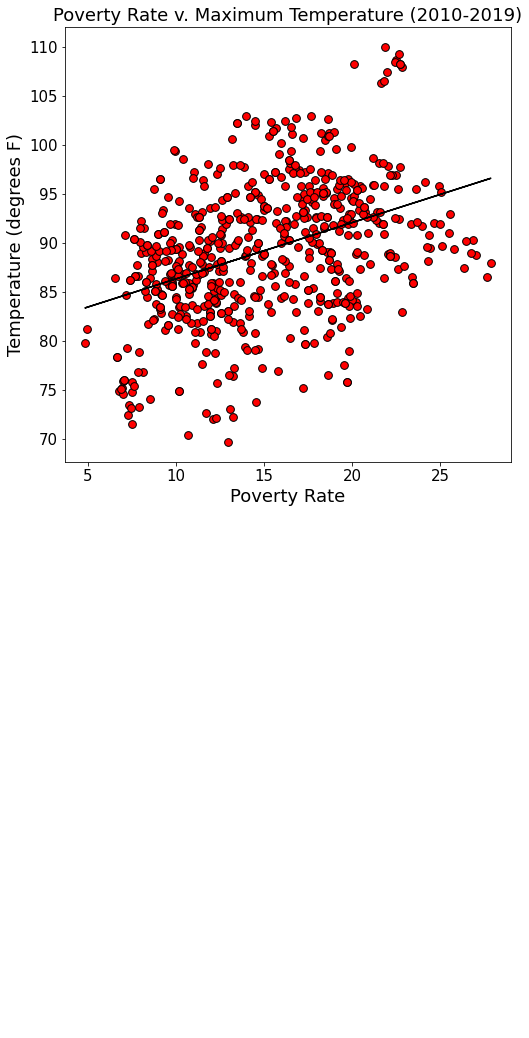

In [88]:
# Create a scatterplot for poverty rate v. D4 

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('MaxTemp_Income.png')df.columns = df.columns.str.replace('[#,@,&]', '')

plt.show()

Correlation coefficient = -0.4
Linear regression model: y = -0.0x + 98.88
P-Value = 1.2139651328246222e-25


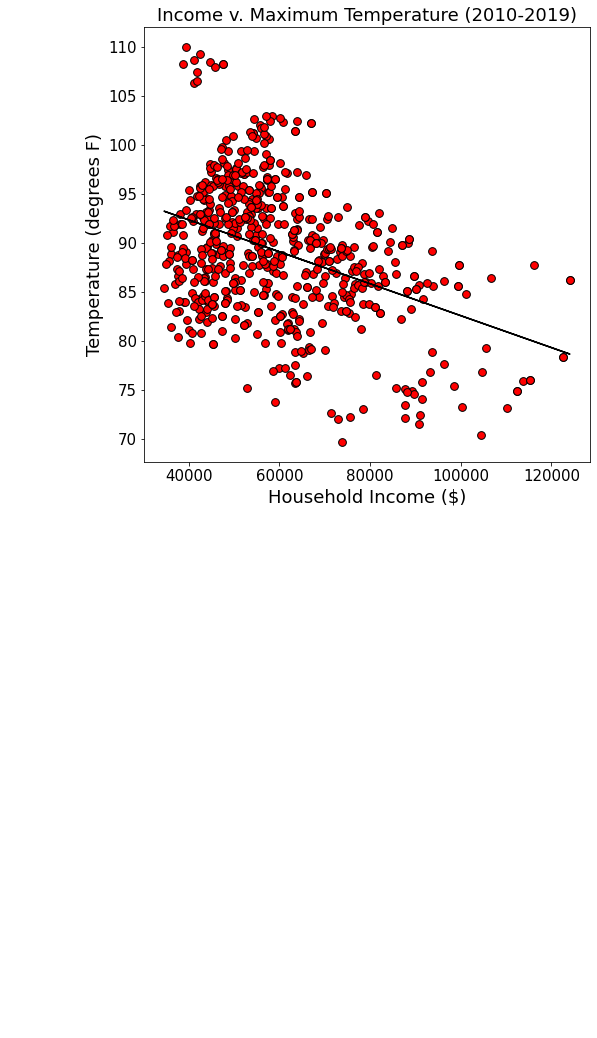

In [90]:
# Create a scatterplot for poverty rate v. D4 

#Define variables
x = merged_df['Household Income']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Income v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Household Income ($)", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('MaxTemp_PovertyRate.png')

plt.show()

In [16]:
Extreme_temp = merged_df.loc[merged_df["Temp (F)"]>103.9]
Ext_temp_income = Extreme_temp["Household Income"]

In [17]:
Nonextreme_temp = merged_df.loc[merged_df["Temp (F)"]<103.9]
Nonext_temp_income = Nonextreme_temp["Household Income"]

In [19]:
st.ttest_ind(Ext_temp_income, Nonext_temp_income, equal_var=False)

Ttest_indResult(statistic=-14.585135877577466, pvalue=3.8539459042890484e-13)